## Installing Dependencies and Importing essential Libraries

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 & pip install -r requirements.txt

  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\tqdm-4.62.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.




  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:


In [2]:
!cd yolov5 & pip install -r requirements.txt

  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\tqdm-4.62.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Priya Sharma/.cache\torch\hub\ultralytics_yolov5_master
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...
requirements:  Command 'pip install "tqdm>=4.64.0"  ' returned non-zero exit status 1.
YOLOv5  2022-12-22 Python-3.9.7 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = "https://bestlifeonline.com/wp-content/uploads/sites/3/2017/11/shutterstock_693186835.jpg?quality=82&strip=all"
results = model(img)
results.print()

image 1/1: 616x1024 1 cup, 1 keyboard, 1 cell phone, 4 books
Speed: 879.9ms pre-process, 642.6ms inference, 0.0ms NMS per image at shape (1, 3, 416, 640)


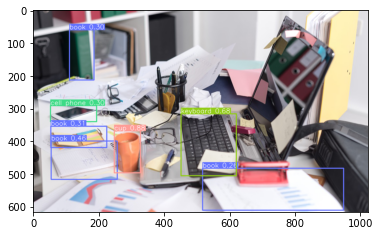

In [5]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
results.render()

[array([[[111, 102, 105],
         [105,  96,  99],
         [ 96,  90,  94],
         ...,
         [227, 226, 231],
         [227, 226, 231],
         [227, 226, 231]],
 
        [[112, 103, 106],
         [107,  98, 101],
         [ 98,  92,  96],
         ...,
         [227, 226, 231],
         [227, 226, 231],
         [227, 226, 231]],
 
        [[114, 105, 108],
         [110, 101, 104],
         [102,  96,  98],
         ...,
         [227, 226, 231],
         [227, 226, 231],
         [227, 226, 231]],
 
        ...,
 
        [[225, 224, 232],
         [225, 224, 232],
         [225, 224, 232],
         ...,
         [ 39,  40,  45],
         [ 47,  48,  53],
         [ 54,  55,  60]],
 
        [[225, 224, 232],
         [225, 224, 232],
         [225, 224, 232],
         ...,
         [ 42,  43,  48],
         [ 50,  51,  56],
         [ 57,  58,  63]],
 
        [[226, 225, 233],
         [225, 224, 232],
         [225, 224, 232],
         ...,
         [ 43,  44,  49],
  

## Real Time Detections with Live Camera

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Detecting on a video from Local System 

In [11]:
cap = cv2.VideoCapture("traffic.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()